In [4]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plb
import seaborn as sns

In [55]:
print("################################\n")
print("HW          : Cover Analysis 2\n")
print("Name     : Madhuri Kalani\n")
print("Date        : ", np.datetime64('2018-07-11'))
print("\n################################\n\n\n")

################################

HW          : Cover Analysis 2

Name     : Madhuri Kalani

Date        :  2018-07-11

################################





In [104]:
cover_ds= pd.read_csv('cover_dataset.csv', sep=',')
cover_ds = pd.DataFrame(cover_ds)
cover_ds.info()
display(cover_ds.head())
cover_ds.describe()
cover_ds.replace("na", np.nan, inplace=True)
#cover_ds['sold_customer']= cover_ds['sold_customer'].replace("na", np.nan, inplace=False).astype(float)
cover_ds['sold_customer']=pd.to_numeric(cover_ds['sold_customer'].fillna(-1))

#cover_ds['first_request_created_at']= cover_ds['sold_customer'].replace("na", np.nan, inplace=False)


cover_ds['first_request_created_at']=pd.to_datetime(cover_ds['first_request_created_at'].fillna(0))
cover_ds['count_completed_requests']=pd.to_numeric(cover_ds['count_completed_requests'].fillna(-1))
cover_ds['customer_completed_at']=pd.to_datetime(cover_ds['customer_completed_at'].fillna(-1))
cover_ds['agent_time_to_respond_minutes']=pd.to_numeric(cover_ds['agent_time_to_respond_minutes'].fillna(-1))
cover_ds['count_messages']=pd.to_numeric(cover_ds['count_messages'].fillna(-1))
cover_ds['count_incoming']=pd.to_numeric(cover_ds['count_incoming'].fillna(-1))
cover_ds['count_outgoing']=pd.to_numeric(cover_ds['count_outgoing'].fillna(-1))
cover_ds.describe()
cover_ds['first_request_month']=pd.to_datetime(cover_ds['first_request_created_at']).dt.month
cover_ds['first_request_year']=pd.to_datetime(cover_ds['first_request_created_at']).dt.year
cover_ds['first_request_quarter']=pd.to_datetime(cover_ds['first_request_created_at']).dt.quarter

cover_ds['agent_time_to_respond_hours']=pd.to_numeric(cover_ds['agent_time_to_respond_minutes']/60)
cover_ds['agent_time_to_respond_days']=pd.to_numeric(cover_ds['agent_time_to_respond_hours']/24)
cover_ds['device_type']=cover_ds.device_type.str[:7]
cover_ds['device_ver']=cover_ds.device_type.str[8:14].replace('', 1, inplace=False)
tt= ('0' + cover_ds['first_request_quarter'].astype(str))+ ' ' + cover_ds['first_request_year'].astype(str)

tt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 12 columns):
user_id                          16519 non-null int64
installation_at                  16519 non-null object
first_request_created_at         10852 non-null object
count_completed_requests         11769 non-null float64
device_type                      16519 non-null object
carrier_name                     13083 non-null object
customer_completed_at            6316 non-null object
agent_time_to_respond_minutes    6554 non-null float64
count_messages                   10864 non-null float64
count_incoming                   10864 non-null float64
count_outgoing                   10864 non-null float64
sold_customer                    11769 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


,user_id,installation_at,first_request_created_at,count_completed_requests,device_type,carrier_name,customer_completed_at,agent_time_to_respond_minutes,count_messages,count_incoming,count_outgoing,sold_customer
0,224504,10/18/17 0:00,10/18/17 0:00,1.0,iOS,T-Mobile,NaN,2653.0,11.0,3.0,8.0,0.0
1,224511,10/18/17 0:00,10/18/17 0:00,1.0,iOS,T-Mobile,10/19/17 0:00,1794.0,11.0,3.0,8.0,0.0
2,124506,10/18/17 0:00,NaN,0.0,iOS,T-Mobile,NaN,NaN,NaN,NaN,NaN,0.0
3,224516,10/18/17 0:00,10/18/17 0:00,1.0,iOS,NaN,10/19/17 0:00,1706.0,10.0,3.0,7.0,0.0
4,224519,10/18/17 0:00,10/18/17 0:00,1.0,iOS,TFW,10/19/17 0:00,1608.0,8.0,2.0,6.0,0.0


,user_id,count_completed_requests,agent_time_to_respond_minutes,count_messages,count_incoming,count_outgoing,sold_customer
count,16519.000000,11769.000000,6554.000000,10864.000000,10864.000000,10864.000000,11769.000000
mean,186316.898965,1.394936,2824.129997,14.955817,4.960880,9.994937,0.036537
std,49593.860483,1.157922,7034.707675,20.808926,9.288429,11.827011,0.187629
min,111499.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,130035.000000,1.000000,462.750000,6.000000,0.000000,4.000000,0.000000
50%,225689.000000,1.000000,1302.000000,9.000000,2.000000,7.000000,0.000000
75%,229869.500000,2.000000,3013.000000,16.000000,6.000000,11.000000,0.000000
max,244210.000000,60.000000,152483.000000,394.000000,190.000000,204.000000,1.000000


,user_id,count_completed_requests,agent_time_to_respond_minutes,count_messages,count_incoming,count_outgoing,sold_customer
count,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000
mean,186316.898965,0.706278,1119.885163,9.493613,2.920274,6.231007,-0.261517
std,49593.860483,1.459566,4641.426796,18.495676,8.046029,10.918288,0.495179
min,111499.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,130035.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,225689.000000,1.000000,-1.000000,6.000000,0.000000,4.000000,0.000000
75%,229869.500000,1.000000,891.000000,12.000000,3.000000,9.000000,0.000000
max,244210.000000,60.000000,152483.000000,394.000000,190.000000,204.000000,1.000000


0        04 2017
1        04 2017
2        01 1970
3        04 2017
4        04 2017
5        04 2017
6        04 2017
7        01 1970
8        04 2017
9        04 2017
10       04 2017
11       01 1970
12       01 1970
13       04 2017
14       04 2017
15       01 2018
16       04 2017
17       04 2017
18       04 2017
19       01 2018
20       04 2017
21       04 2017
22       01 1970
23       01 1970
24       04 2017
25       04 2017
26       04 2017
27       01 1970
28       04 2017
29       04 2017
          ...   
16489    01 1970
16490    01 2018
16491    01 1970
16492    01 2018
16493    01 2018
16494    01 1970
16495    01 2018
16496    01 2018
16497    01 2018
16498    01 1970
16499    01 2018
16500    01 2018
16501    01 2018
16502    01 1970
16503    01 1970
16504    01 2018
16505    01 2018
16506    01 2018
16507    01 2018
16508    01 1970
16509    01 1970
16510    01 2018
16511    01 2018
16512    01 2018
16513    01 2018
16514    01 2018
16515    01 2018
16516    01 20

dtype('int64')

([<matplotlib.patches.Wedge at 0x1883057e1d0>,
 [Text(-0.742106,0.65527,'Not Sold'),
  Text(0.686099,-0.7137,'Pending'),
  Text(1.07239,0.195166,'Sold')],
 [Text(-0.404785,0.35742,'68.64%'),
  Text(0.374236,-0.389291,'28.75%'),
  Text(0.629657,0.114593,'2.60%')])

Text(0.5,1,'Class Distribution: Insurance Selling Status')

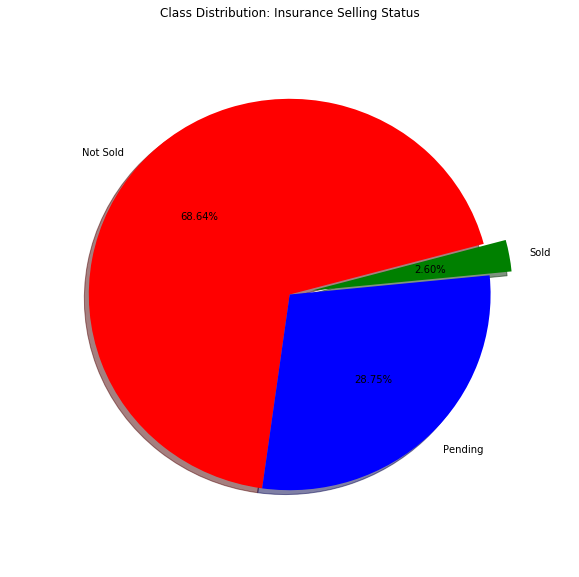

In [95]:
count_sold = cover_ds.sold_customer.value_counts()
plt.figure(figsize=(10,10))
b= plb.round_(count_sold.values)

b[1].dtype
c=['red','blue','green']
e=[0,0,0.1]
l = 'Not Sold','Pending','Sold'
plb.pie(b, explode= e, labels=l, colors=c, radius=.9, autopct='%1.2f%%', shadow=True, startangle=15)

plt.title('Class Distribution: Insurance Selling Status')
plt.show()

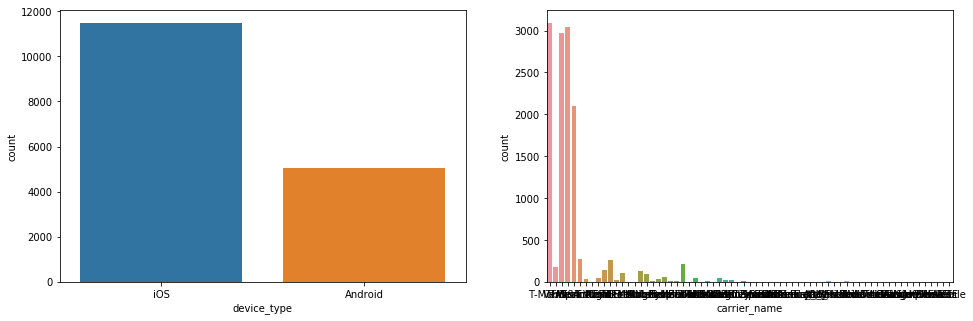

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
plt.rcParams['figure.figsize']=(15,6)
sns.countplot(x="device_type", data=cover_ds,ax=axes[0])
sns.countplot(x="carrier_name", data=cover_ds,ax=axes[1])
plt.show()

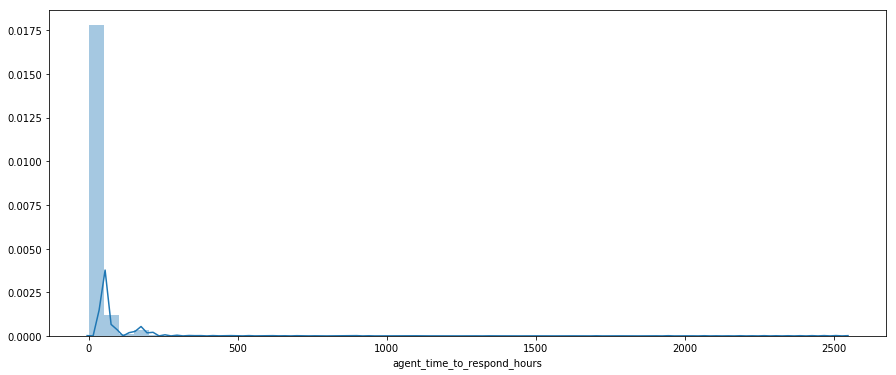

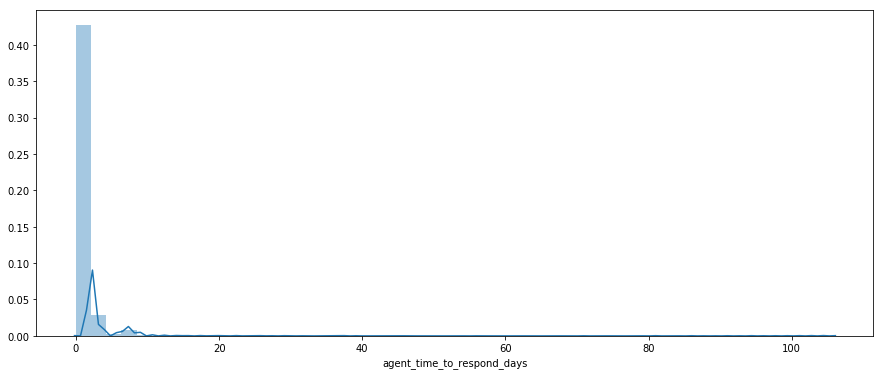

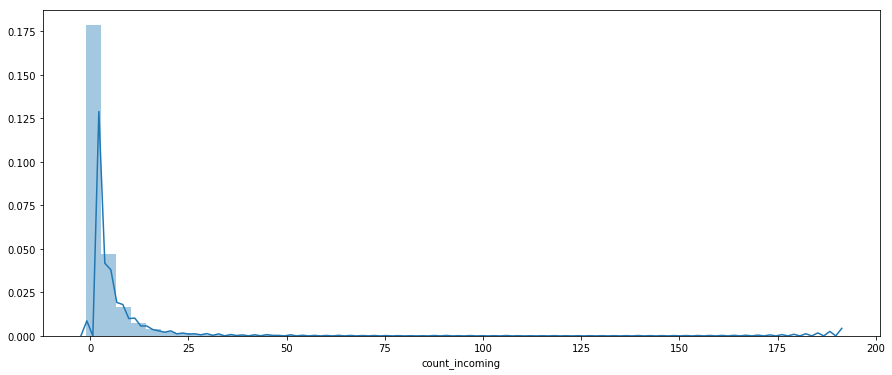

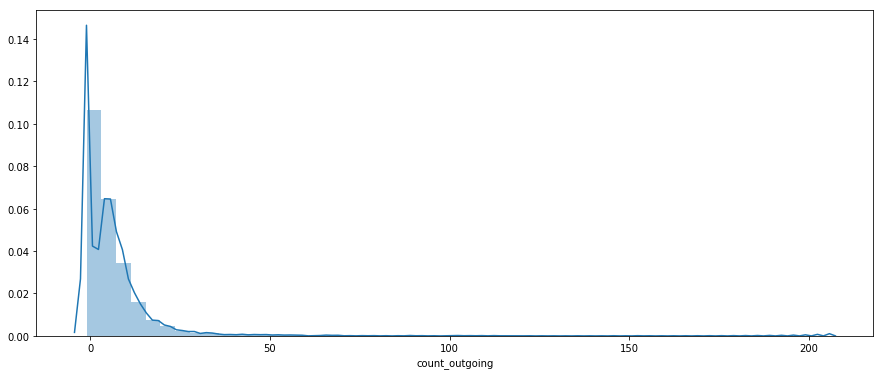

In [71]:
sns.distplot(cover_ds.agent_time_to_respond_hours)
plt.show()
sns.distplot(cover_ds.agent_time_to_respond_days)
plt.show()
sns.distplot(cover_ds.count_incoming)
plt.show()
sns.distplot(cover_ds.count_outgoing)
plt.show()

KeyboardInterrupt: 

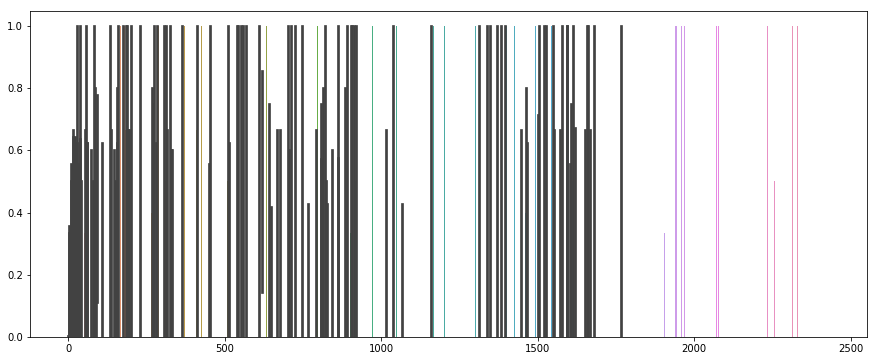

In [72]:
sns.barplot(x="agent_time_to_respond_days",y="sold_customer" ,data=cover_ds)

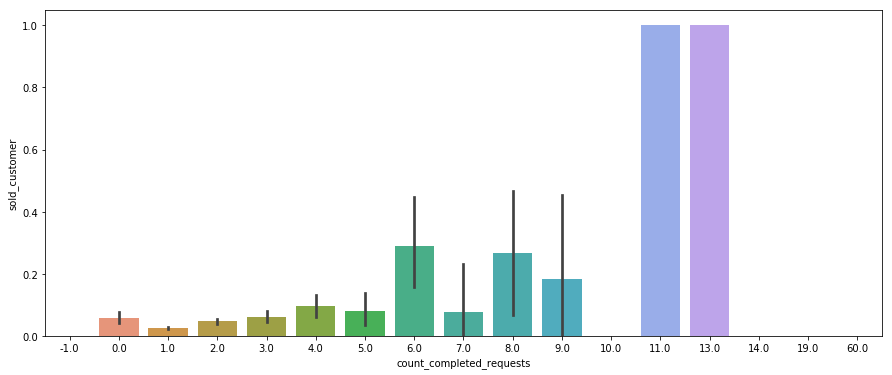

In [73]:
sns.barplot(x="count_completed_requests",y="sold_customer" ,data=cover_ds)

In [101]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
#cover_ds['first_request_created_at']=np.asarray(pd.to_datetime(cover_ds['first_request_created_at']))
x = sm.add_constant(cover_ds['first_request_year'])
y = cover_ds['sold_customer']

#z= np.random.randint(0,16520, 16520)
#z.describe()
regr = sm.OLS(y, x)
res = regr.fit()

# Get fitted values from model to plot
st, data, ss2 = summary_table(res, alpha=0.05)

fitted_values = data[:,2]

Text(0.5,1,'Line of Best Fit for Number of Conversions vs Year')

Text(0.5,0,'Year')

Text(0,0.5,'Conversions')

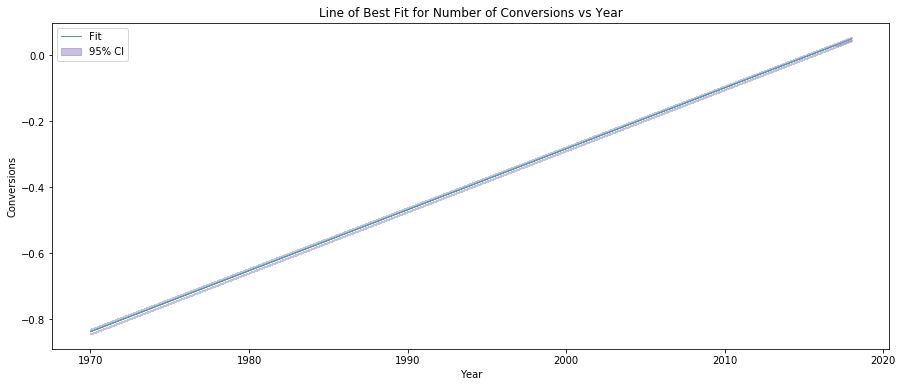

In [106]:
    predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
    _, ax = plt.subplots()

    # Plot the data, set the linewidth, color and transparency of the
    # line, provide a label for the legend
    ax.plot(cover_ds['first_request_year'], fitted_values, lw = 1, color = '#539caf', alpha = 1, label = 'Fit')
    # Shade the confidence interval
    ax.fill_between(cover_ds['first_request_year'], predict_mean_ci_low, predict_mean_ci_upp, color = '#7663b0', alpha = 0.4, label = '95% CI')
    # Label the axes and provide a title
    ax.set_title('Line of Best Fit for Number of Conversions vs Year')
    ax.set_xlabel('Year')
    ax.set_ylabel('Conversions')

    # Display legend
    ax.legend(loc = 'best')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 17 columns):
user_id                          16519 non-null int64
installation_at                  16519 non-null object
first_request_created_at         16519 non-null datetime64[ns]
count_completed_requests         16519 non-null float64
device_type                      16519 non-null object
carrier_name                     13083 non-null object
customer_completed_at            16519 non-null datetime64[ns]
agent_time_to_respond_minutes    16519 non-null float64
count_messages                   16519 non-null float64
count_incoming                   16519 non-null float64
count_outgoing                   16519 non-null float64
sold_customer                    16519 non-null float64
first_request_month              16519 non-null int64
first_request_year               16519 non-null int64
agent_time_to_respond_hours      16519 non-null float64
agent_time_to_respond_days       16519 non-nul

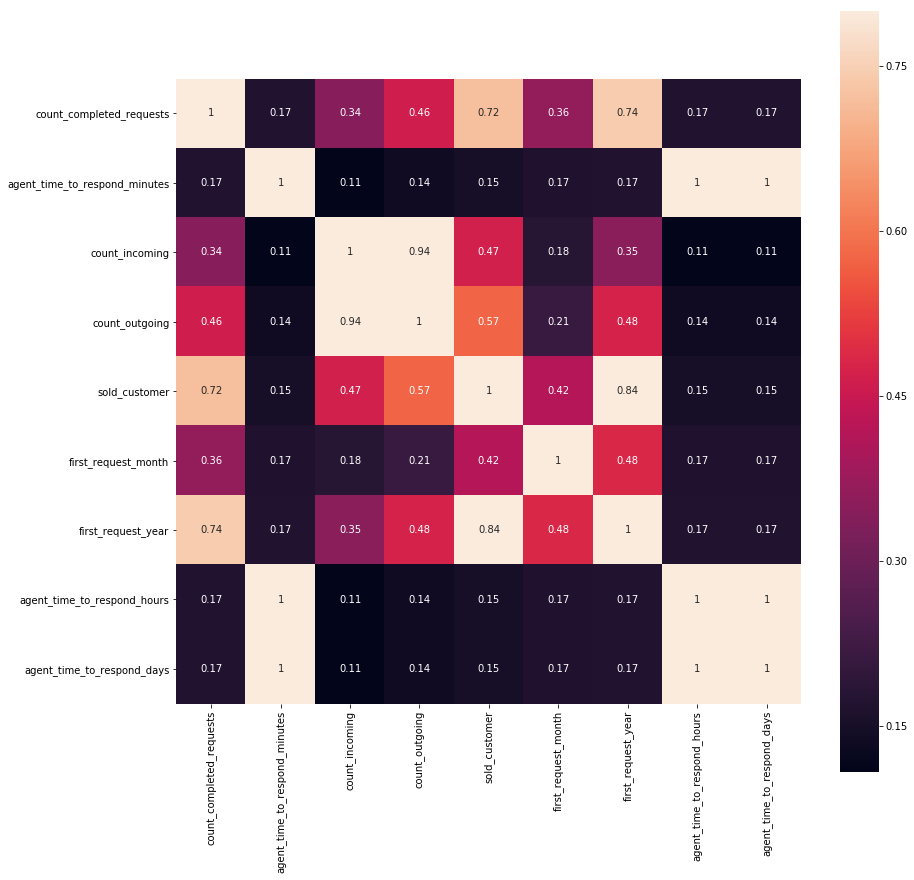

In [32]:
cover_ds.info()
heat_map = cover_ds.iloc[:,[2,3,4,5,6,7,9,10,11,12,13,14,15]]

plt.figure(figsize=(14,14))
sns.heatmap(heat_map.corr(), vmax=0.8, square=True, annot=True)
plt.show()

C:\Users\akash\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\akash\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\akash\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


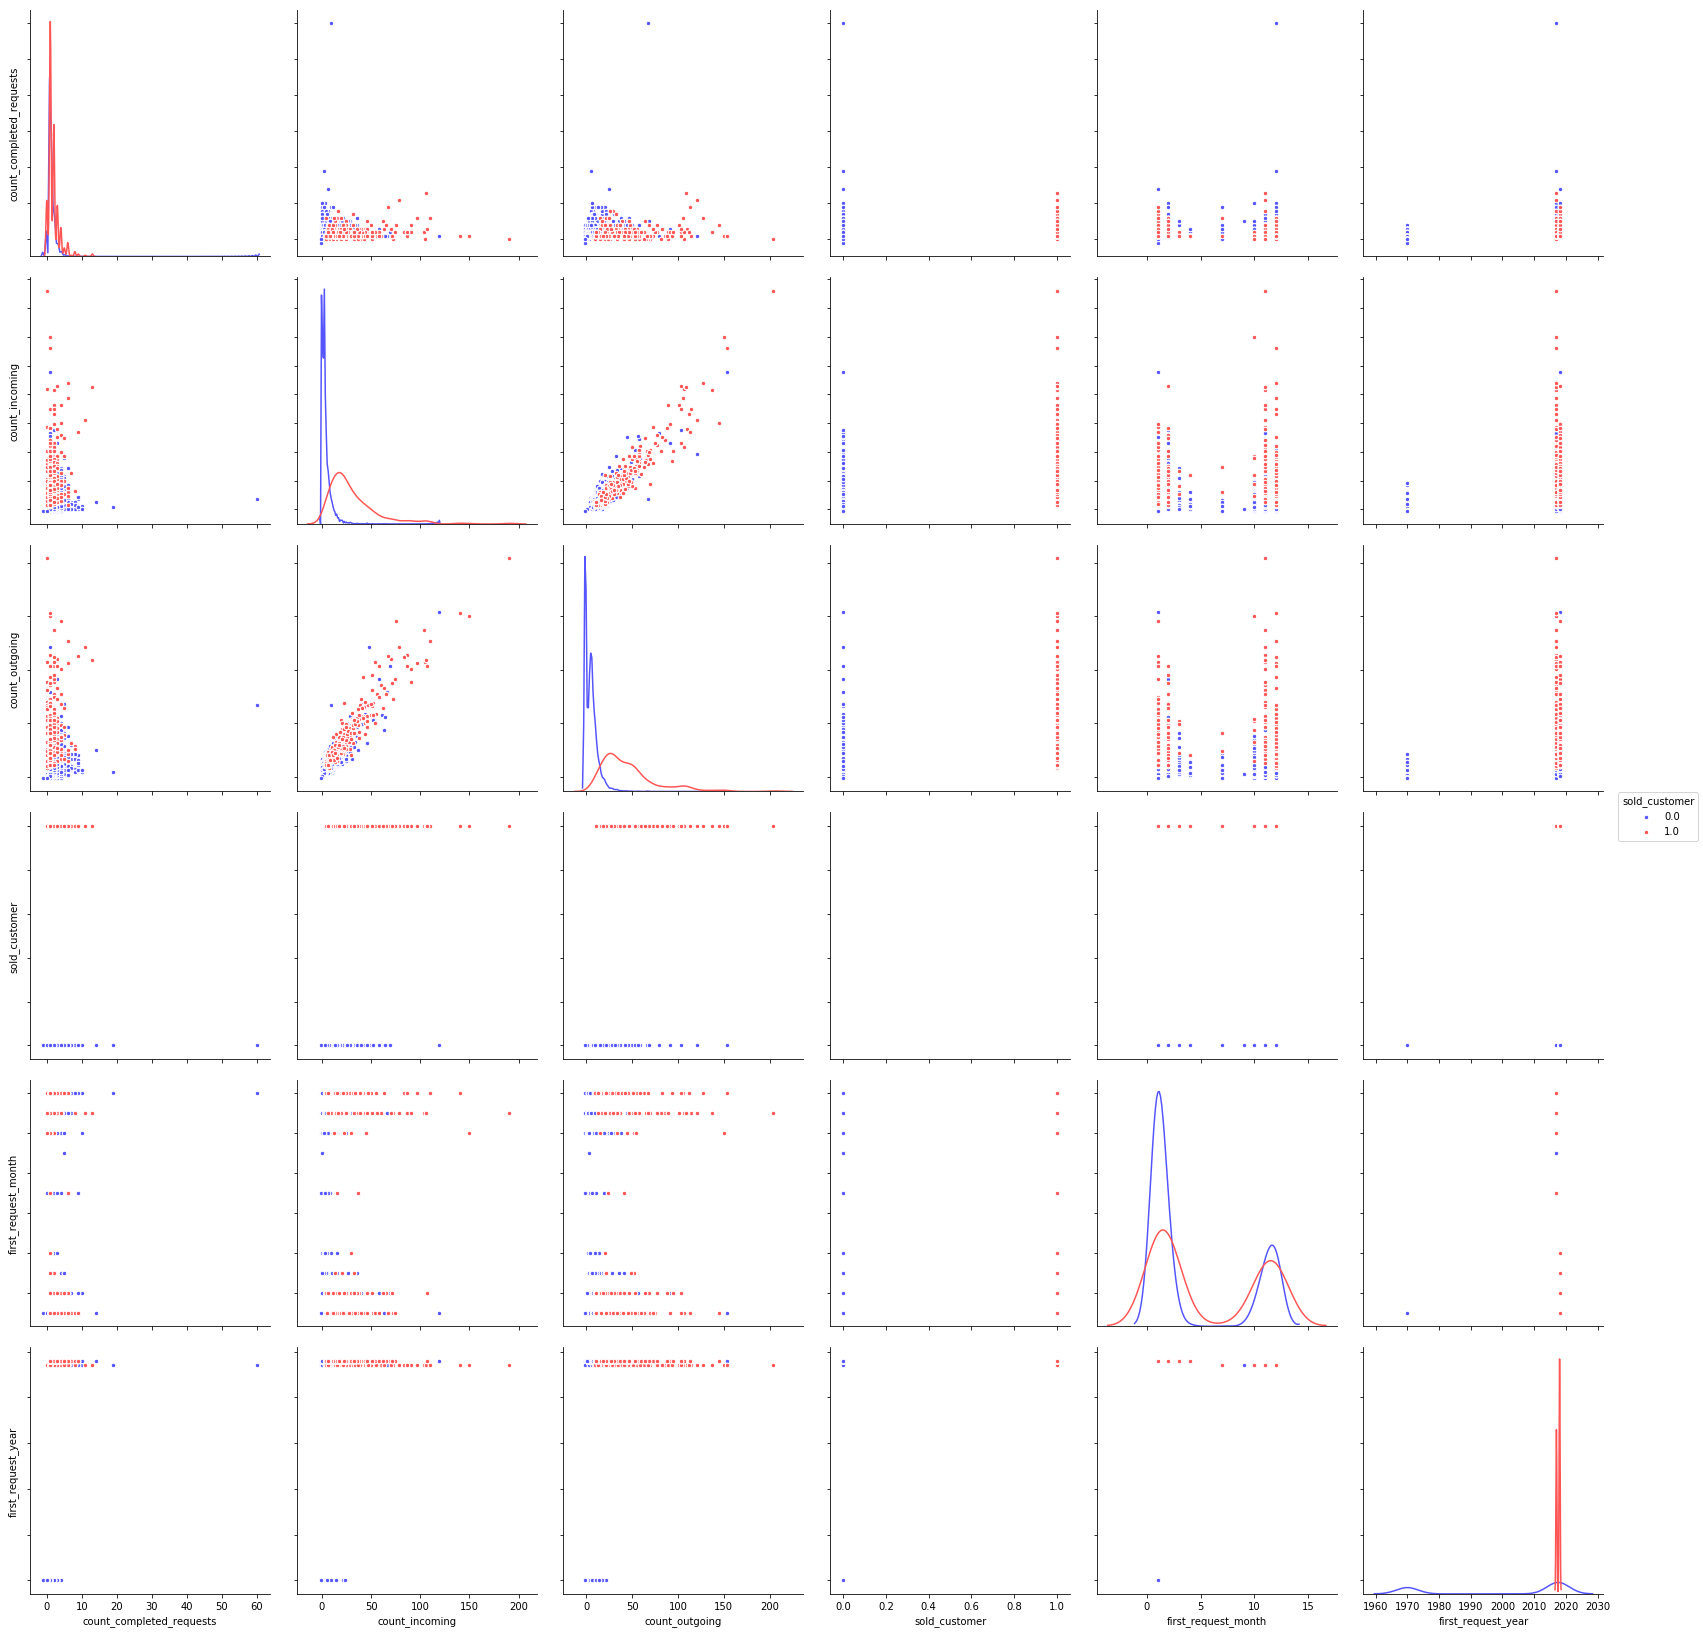

In [43]:
#Variable dist
cover_ds['sold_customer']=cover_ds['sold_customer'].replace(-1,0,inplace=False)
#cover_ds['sold_customer']=pd.to_numeric(cover_ds['sold_customer'].fillna(0))
heat_map_2 = cover_ds.iloc[:,[3,9,10,11,12,13]]

g = sns.pairplot(data=heat_map_2, size=3.8,palette = 'seismic',diag_kind = 'kde',plot_kws=dict(s=20),hue = 'sold_customer')
g.set(yticklabels=[])
plt.show()

Text(0,0.5,'Conversion')

Text(0.5,0,'Month')

Text(0.5,1,'test')

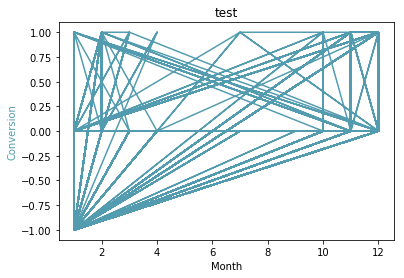

In [114]:
    _, ax1 = plt.subplots()
    ax1.plot(cover_ds['first_request_month'], cover_ds['sold_customer'], color = '#539caf')
    # Label axes
    ax1.set_ylabel('Conversion', color = '#539caf')
    ax1.set_xlabel('Month')
    ax1.set_title("test")

    # Create the second plot object, telling matplotlib that the two
    # objects have the same x-axis
   # ax2 = ax1.twinx()
    #ax2.plot(cover_ds['first_request_year'], cover_ds['sold_customer'], color = '#7663b0')
    #ax2.set_xlabel('Year', color = '#7663b0')
    # Show right frame line
   # ax2.spines['right'].set_visible(True)

Text(0.5,1,'test')

Text(0.5,0,'month')

Text(0,0.5,'sold')

Text(0,0.5,'sold')

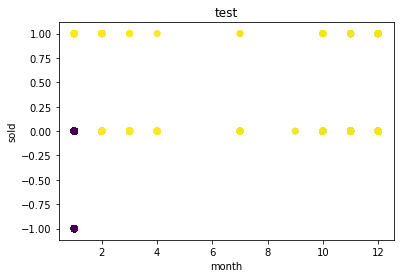

In [117]:
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(cover_ds['first_request_month'], cover_ds['sold_customer'],c=cover_ds['first_request_year'], alpha = 0.75)

    # Label the axes and provide a title
    ax.set_title('test')
    ax.set_xlabel('month')
    ax.set_ylabel('sold')
    ax.set_ylabel('sold')

array([-1.,  0.,  1.])

No handles with labels found to put in legend.


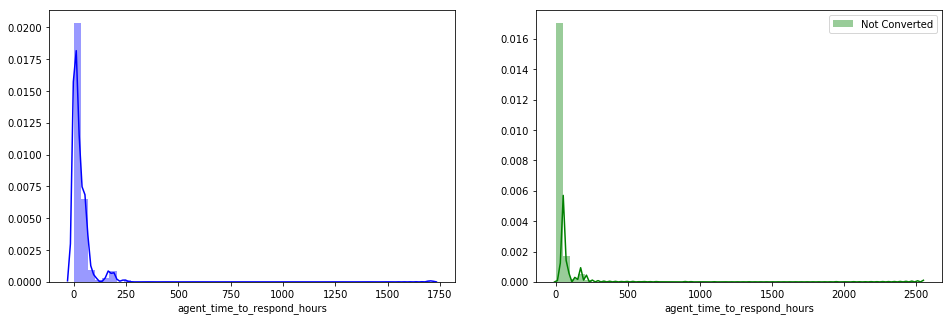

In [132]:
d = (cover_ds.agent_time_to_respond_minutes/60)/24

np.unique(cover_ds['sold_customer'].fillna('-1'))
import seaborn as sns
#plt.figure(figsize=(8,8))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
sns.distplot(
    (cover_ds[cover_ds.sold_customer==1].agent_time_to_respond_hours),
    color='b', label='Time to conversion', ax=axes[0]
)
plt.legend()
sns.distplot(
    (cover_ds[cover_ds.sold_customer==0].agent_time_to_respond_hours), color='g', label='Not Converted',ax=axes[1]
)
plt.legend()
plt.show()

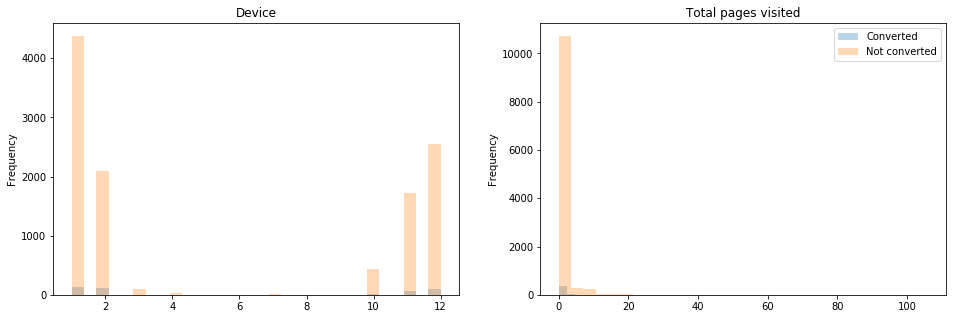

In [129]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

cover_ds.loc[cover_ds.sold_customer==1 ,'first_request_month'].plot.hist( bins= 30, ax=axes[0], alpha=.3, title= 'Device', label='Converted')
cover_ds.loc[cover_ds.sold_customer==0 ,'first_request_month'].plot.hist( bins= 30, ax=axes[0], alpha=.3, label='Not converted')
cover_ds.loc[cover_ds.sold_customer==1 ,'agent_time_to_respond_days'].plot.hist( bins= 30, ax=axes[1], alpha=.3, title= 'Total pages visited', label='Converted')
cover_ds.loc[cover_ds.sold_customer==0  ,'agent_time_to_respond_days'].plot.hist( bins= 30, ax=axes[1], alpha=.3,  label='Not converted')

plt.legend()

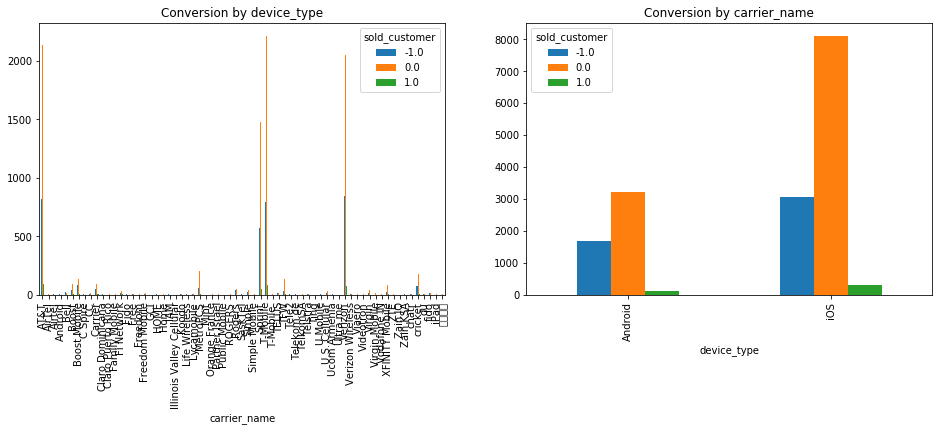

In [157]:
tmp= cover_ds.device_type.str[:7]
tmp1 = cover_ds.groupby(['device_type', 'sold_customer']).size().unstack()
tmp2 = cover_ds.groupby(['carrier_name', 'sold_customer']).size().unstack()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
tmp2.plot.bar(stacked= False, ax=axes[0], title = 'Conversion by device_type')
tmp1.plot.bar(stacked= False, ax=axes[1], title = 'Conversion by carrier_name')

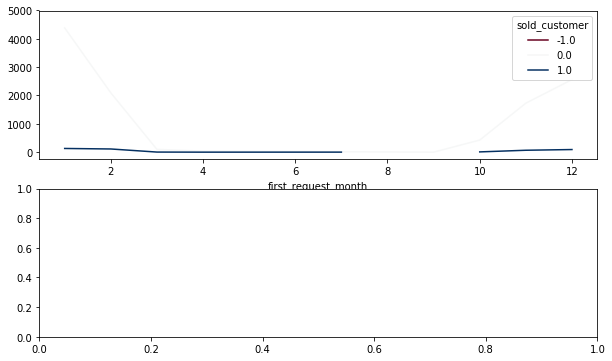

In [158]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize = (10,6))
cover_ds.groupby(['first_request_month']).sold_customer.value_counts().unstack().plot(ax = axes[0], cmap='RdBu')

In [24]:
cover_ds_copy =cover_ds

cover_ds_copy.info()
#del cover_ds_copy['first_request_created_at']
#del cover_ds_copy['customer_completed_at']
#del cover_ds_copy['device_type']
#del cover_ds_copy['carrier_name']
#del cover_ds_copy['installation_at']
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
cover_ds_copy.info()
cover_ds_copy.columns
cover_test=pd.DataFrame()
cover_test.append(cover_ds_copy[0])
#forest.fit(cover_ds_copy, cover_ds)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


print("Feature ranking:")

for f in range(cover_ds.shape[1]):
    print("%d. %s (%f)" % (f + 1, list(cover_ds.columns)[indices[f]], importances[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(cover_ds.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(cover_ds.shape[1]), indices)
plt.xlim([-1, cover_ds.shape[1]])
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 12 columns):
user_id                          16519 non-null int64
count_completed_requests         16519 non-null float64
agent_time_to_respond_minutes    16519 non-null float64
count_messages                   16519 non-null float64
count_incoming                   16519 non-null float64
count_outgoing                   16519 non-null float64
sold_customer                    16519 non-null float64
first_request_month              16519 non-null int64
first_request_year               16519 non-null int64
agent_time_to_respond_hours      16519 non-null float64
agent_time_to_respond_days       16519 non-null float64
device_ver                       16519 non-null int64
dtypes: float64(8), int64(4)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 12 columns):
user_id                          16519 non-null int64
count_complete

Index(['user_id', 'count_completed_requests', 'agent_time_to_respond_minutes',
       'count_messages', 'count_incoming', 'count_outgoing', 'sold_customer',
       'first_request_month', 'first_request_year',
       'agent_time_to_respond_hours', 'agent_time_to_respond_days',
       'device_ver'],
      dtype='object')

KeyError: 0

In [58]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
#Splitting data set into X (independent) and Y (dependent) values
X = cover_ds.iloc[:,0:16]
Y = cover_ds.iloc[:,-1]

#Splitting X and Y set in training & test set
X_train, X_test, Y_train, Y_test = train_test_split(X.iloc[:,[3,9,10,11,12,13]],Y,test_size =0.2,random_state = 1)

#Converting Y value to categorical variable in order to use regression with SK learn
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y_train)
encoded = lab_enc.fit_transform(Y_test)

#extracting the name of the columns variables
dic1 = [3,9,10,12,13]
dic2= X_train.columns.tolist()

In [55]:
from sklearn.linear_model import LogisticRegression
# Creation of regressor
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

#predicting the test result
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print('confusion matrix       ')
fig, ax = plot_confusion_matrix(conf_mat=cm)

score = classifier.score(X_test, Y_test)
print('score =', score)


plt.show()

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

score = 1.0
confusion matrix       


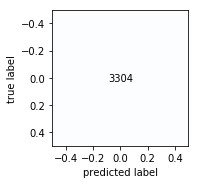

In [60]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix

classifier_random_forest = RandomForestClassifier(n_estimators = 500,criterion = 'entropy',random_state = 1)
classifier_random_forest.fit(X_train,Y_train)
Y_pred_forest = classifier_random_forest.predict(X_test)

score = classifier_random_forest.score(X_test, Y_test)
print('score =', score)

Y_pred_binary =[]

for i in Y_pred_forest:
    if i >= 0.5:
        outcome = 1
    else:
        outcome = 0
    Y_pred_binary.append(outcome)

#Making confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_binary)
print('confusion matrix       ')
fig, ax = plot_confusion_matrix(conf_mat=cm)

plt.show()

In [74]:
feature_cols =['count_completed_requests','count_incoming','count_outgoing','first_request_month','first_request_year']

X = cover_ds[feature_cols]
y = cover_ds.sold_customer

In [75]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X,y,test_size=0.2,random_state=45)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(13215, 5)
(3304, 5)
(13215,)
(3304,)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Model Score :  98.18
Acc_Score :  0.9851694915254238


Text(0.5,33,'Predicted')

Text(114,0.5,'Actual')

Log: [0.98547215 0.98244552 0.98184019 0.98214286 0.97971541]
Log: 0.9823232273250746


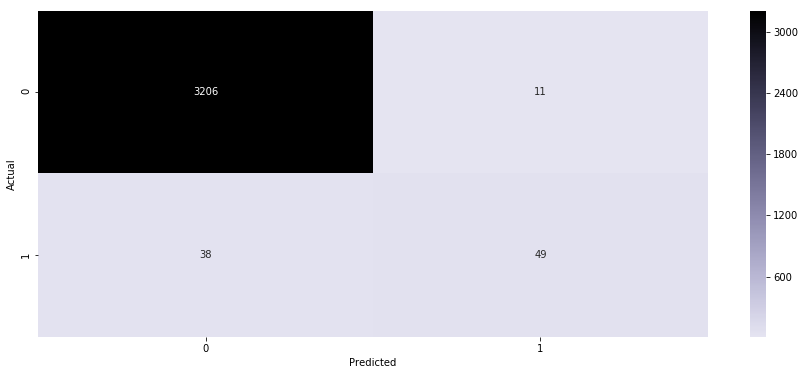

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
logreg_pred = logreg.predict(xtest)

Model_log = round(logreg.score(xtrain,ytrain)*100,2)
print("Model Score : " ,Model_log)
Acc_log = accuracy_score(logreg_pred,ytest)
print("Acc_Score : ", Acc_log)

from sklearn import metrics
cnf_metrix = (metrics.confusion_matrix(ytest,logreg_pred))
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cnf_metrix,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual')


from sklearn.cross_validation import cross_val_score
scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy') #fitting logistic regression to whole data with 5 fold
print("Log:",scores)
print("Log:" ,scores.mean())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

Model Score :  98.21
Acc_Score :  0.9860774818401937


Text(0.5,33,'Predicted')

Text(114,0.5,'Actual')

Log: [0.98547215 0.98305085 0.98032688 0.98062954 0.9763851 ]
Log: 0.9811729046673395


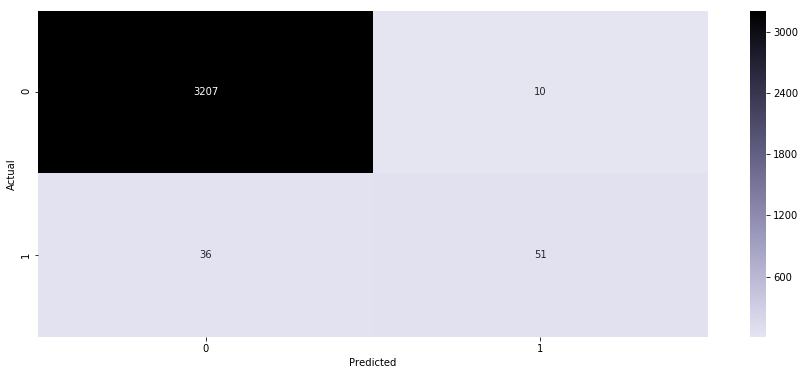

In [78]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 200, random_state = 1)

forest.fit(xtrain,ytrain)
forest_Pred = forest.predict(xtest).astype(int)

Model_forest = round(forest.score(xtrain,ytrain)*100,2)
print("Model Score : " ,Model_forest)
Acc_forest = metrics.accuracy_score(forest_Pred,ytest,normalize=True)
print("Acc_Score : ", Acc_forest)

#Confusion Metrix 

from sklearn import metrics
cnf_metrix = (metrics.confusion_matrix(ytest,forest_Pred))
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cnf_metrix,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual')


#Cross Validation
# Cross-Validation
scores = cross_val_score(forest, X, y, cv=5, scoring='accuracy') #fitting Decision Tree to whole data with 5 fold
print("Log:",scores)
print("Log:" ,scores.mean())


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

Text(0.5,0,'False positive rate')

Text(0,0.5,'True positive rate')

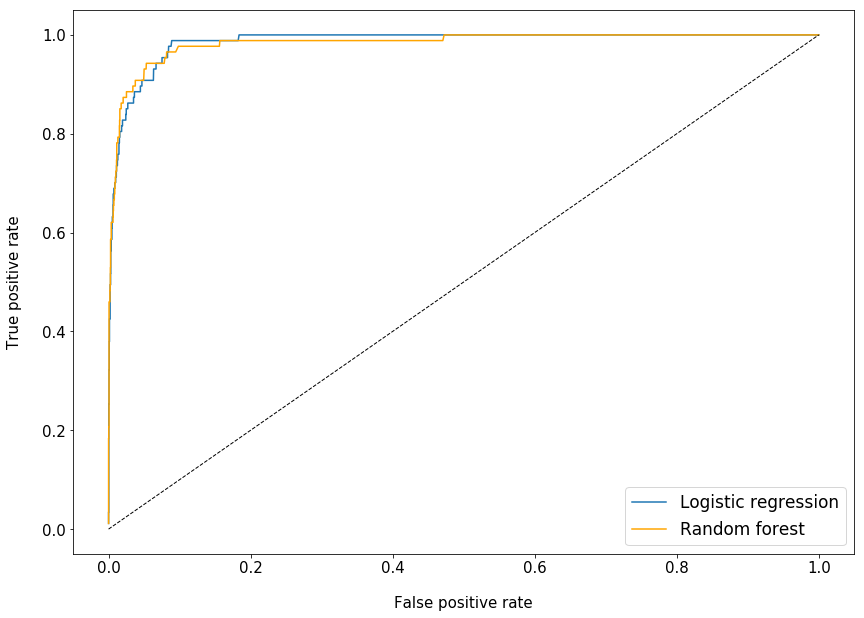

AUC
0.9859582176583452
0.9833838908957085


In [79]:
#Computing the values of the roc curve
preds = logreg.predict_proba(xtest)[:,1]
fpr_0, tpr_0, _ = metrics.roc_curve(ytest, preds)
preds = forest.predict_proba(xtest)[:,1]
fpr, tpr, _ = metrics.roc_curve(ytest, preds)

#plotting the graph
plt.figure(figsize = (14,10))
logistic_regression_roc = plt.plot(fpr_0,tpr_0, label='Logistic regression')
random_forest_roc = plt.plot(fpr,tpr,label='Random forest', c='orange')
plt.plot([0,1],[0,1],c='black', ls='--',linewidth =1)
plt.legend(loc=4,fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('False positive rate', fontsize=15,labelpad=20)
plt.ylabel('True positive rate', fontsize=15, labelpad=20)
plt.show()

#Computing the value of AUC
auc_logistic = np.trapz(tpr_0,fpr_0)
auc_random = np.trapz(tpr,fpr)

print('AUC')
print(auc_logistic)
print(auc_random)